<h1>Table of Contents</h1>

<li>
    <a href="#Establishing-connection-between-MySQL-and-Python">
        <u>Establishing connection between MySQL and Python</u>
    </a>
</li>
<li>
    <a href="#Viewing-list-of-tables/views-in-this-dataset">
        <u>Viewing list of tables/views in this dataset</u> 
    </a>
</li>
<li>
    <a href="#SELECT-+-FROM-Keyword-Statements">
        <u>SELECT + FROM Keyword Statements</u> 
    </a>
</li>
<li>
    <a href="#Filtering-queries-using-WHERE-clause">
        <u>Filtering queries using WHERE clause</u>
    </a>
</li>
<li>
    <a href="#Sorting-results-from-queries-using-ORDER-keyword">
        <u>Sorting results from queries using ORDER keyword</u>
    </a>
</li>
<li>
    <a href="#Dealing-with-null-values">
        <u>Dealing with null values</u>
    </a>
</li>
<li>
    <a href="#Grouping-and-Filtering-Data-with-Aggregation-Functions">
        <u>Grouping and Filtering Data with Aggregation Functions</u>
    </a>
</li>
<li>
    <a href="#Summarizing-multiple-rows-into-lists-+-GROUP-BY-keyword">
        <u>Summarizing multiple rows into lists + GROUP BY keyword</u> 
    </a>
</li>
<li>
    <a href="#Complex-Group-By-Functions">
        <u>Complex Group-By Functions</u>
    </a>
</li>
<li>
    <a href="#Joins-in-SQL">
        <u>Joins in SQL</u>
    </a>
</li>
<li>
    <a href="#Case-keyword-for-conditional-statements-and-pivoting-data">
        <u>Case keyword for conditional statements and pivoting data</u>
    </a>
</li>
<li>
    <a href="#Limiting-view-of-number-of-rows">
        <u>Limiting view of number of rows</u>
    </a>
</li>
<li>
    <a href="#Filter-string-data-using-LIKE-keyword-or-REGEXP-function">
        <u>Filter string data using LIKE keyword or REGEXP function</u>
    </a>
</li>
<li>
    <a href="#Most-common-SQL-string-functions">
        <u>Most common SQL string functions</u>
    </a>
</li>
<li>
    <a href="#Subqueries">
        <u>Subqueries</u> 
    </a>
</li>
<li>
    <a href="#Correlated-Subqueries">
        <u>Correlated Subqueries</u> 
    </a>
</li>
<li>
    <a href="#Window-Functions">
        <u>Window Functions</u>
    </a>
</li>
<li>
    <a href="#Common-Table-Expressions">
        <u>Common Table Expressions</u> 
    </a>
</li>
<li>
    <a href="#Stacking-Results-from-Multiple-Queries">
        <u>Stacking Results from Multiple Queries</u> 
    </a>
</li>

<b>Note that this Jupyter Notebook only covers a subset of the Data Manipulation Language, which is retrieving data from tables with SELECT clause. Other details of SQL related syntax like creating tables, inserting records, modifying tables etc. can be found in the PDF notes of this folder.

<b> This notebook mainly focuses on SQL syntax used for querying data by establishing connection between MySQL and Python using mysql.connector library. </b>

## <u>Establishing connection between MySQL and Python</u>

An additional Login.py module is created in a separate file to store configuration details of mysql.connector with variables like host name, database name, user and password.

In [1]:
import mysql.connector
import Login
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
conn = mysql.connector.connect(
host=Login.logins['host'],
database=Login.logins['database'],
user=Login.logins['user'],
password=Login.logins['password'])

Additional note: Python can also be used to connect to other SQL databases like PostgreSQL using <b>psycopg2</b> library and SQL Server Management Studio using <b>pyodbc</b> library

## <u>Viewing list of tables/views in this dataset</u>
This notebook will use the employees dataset that is built-in for MySQL.

Refer to the following link for details of importing the dataset into MySQL: 
https://dev.mysql.com/doc/employee/en/
    
<b>After importing the dataset, the following SQL code needs to be executed in MySQL for converting dates that show "9999-01-01" into null values for the purpose of illustrating ways to deal with null values in SQL:</b>
    
ALTER TABLE salaries
MODIFY COLUMN to_date date DEFAULT NULL;

ALTER TABLE dept_emp
MODIFY COLUMN to_date date DEFAULT NULL;

ALTER TABLE dept_manager
MODIFY COLUMN to_date date DEFAULT NULL;

UPDATE titles
SET to_date = null
WHERE to_date = '9999-01-01';

UPDATE salaries
SET to_date = null
WHERE to_date = '9999-01-01';

UPDATE dept_emp
SET to_date = null
WHERE to_date = '9999-01-01';

UPDATE dept_manager
SET to_date = null
WHERE to_date = '9999-01-01';

In [2]:
tablelist = pd.read_sql('''SHOW FULL tables;''', conn)

In [3]:
tablelist

,Tables_in_employees,Table_type
0,current_dept_emp,VIEW
1,departments,BASE TABLE
2,dept_emp,BASE TABLE
3,dept_emp_latest_date,VIEW
4,dept_manager,BASE TABLE
5,employees,BASE TABLE
6,salaries,BASE TABLE
7,titles,BASE TABLE


The output above shows that the employees database has 6 tables and 2 views being created.
Next, we will extract the tables and views into individual tables for viewing data structure based on the first 5 rows of each table.

In [4]:
departments = pd.read_sql('''SELECT * FROM departments;''', conn)
dept_emp = pd.read_sql('''SELECT * FROM dept_emp;''', conn)
dept_manager = pd.read_sql('''SELECT * FROM dept_manager;''', conn)
employees = pd.read_sql('''SELECT * FROM employees;''', conn)
salaries = pd.read_sql('''SELECT * FROM salaries;''', conn)
titles = pd.read_sql('''SELECT * FROM titles;''', conn)

In [5]:
departments.head()

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing


In [6]:
dept_emp.head()

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,None
1,10002,d007,1996-08-03,None
2,10003,d004,1995-12-03,None
3,10004,d004,1986-12-01,None
4,10005,d003,1989-09-12,None


In [7]:
dept_manager.head()

,emp_no,dept_no,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,None
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,None
4,110183,d003,1985-01-01,1992-03-21


In [8]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [9]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [10]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,None
1,10002,Staff,1996-08-03,None
2,10003,Senior Engineer,1995-12-03,None
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,None


In [11]:
current_dept_emp = pd.read_sql('''SELECT * FROM current_dept_emp;''', conn)
dept_emp_latest_date = pd.read_sql('''SELECT * FROM dept_emp_latest_date;''', conn)

In [12]:
current_dept_emp.head()

,emp_no,dept_no,from_date,to_date
0,10008,d005,1998-03-11,2000-07-31
1,10011,d009,1990-01-22,1996-11-09
2,10015,d008,1992-09-19,1993-08-22
3,10021,d005,1988-02-10,2002-07-15
4,10025,d005,1987-08-17,1997-10-15


In [13]:
dept_emp_latest_date.head()

,emp_no,from_date,to_date
0,10001,1986-06-26,None
1,10002,1996-08-03,None
2,10003,1995-12-03,None
3,10004,1986-12-01,None
4,10005,1989-09-12,None


## <u>SELECT + FROM Keyword Statements</u>
The following basic commands can be used with SELECT and FROM keyword in queries.

### Selecting all columns

In [14]:
pd.read_sql('''SELECT * FROM departments;''', conn)

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing
5,d004,Production
6,d006,Quality Management
7,d008,Research
8,d007,Sales


### Selecting specific columns

In [15]:
pd.read_sql('''SELECT emp_no, first_name, last_name, hire_date FROM employees;''', conn)

,emp_no,first_name,last_name,hire_date
0,10001,Georgi,Facello,1986-06-26
1,10002,Bezalel,Simmel,1985-11-21
2,10003,Parto,Bamford,1986-08-28
3,10004,Chirstian,Koblick,1986-12-01
4,10005,Kyoichi,Maliniak,1989-09-12
...,...,...,...,...
300019,499995,Dekang,Lichtner,1993-01-12
300020,499996,Zito,Baaz,1990-09-27
300021,499997,Berhard,Lenart,1986-04-21
300022,499998,Patricia,Breugel,1993-10-13


### Selecting specific columns with expressions

In [16]:
pd.read_sql('''SELECT emp_no, LOWER(title) AS title, YEAR(from_date) AS hire_year FROM titles;''', conn)

,emp_no,title,hire_year
0,10001,senior engineer,1986
1,10002,staff,1996
2,10003,senior engineer,1995
3,10004,engineer,1986
4,10004,senior engineer,1995
...,...,...,...
443303,499997,engineer,1987
443304,499997,senior engineer,1992
443305,499998,senior staff,1998
443306,499998,staff,1993


### Select qualifying columns from multiple tables

In [17]:
pd.read_sql('''SELECT employees.emp_no, first_name, last_name, title 
            FROM employees
            INNER JOIN titles USING (emp_no);''', conn)

,emp_no,first_name,last_name,title
0,10001,Georgi,Facello,Senior Engineer
1,10002,Bezalel,Simmel,Staff
2,10003,Parto,Bamford,Senior Engineer
3,10004,Chirstian,Koblick,Engineer
4,10004,Chirstian,Koblick,Senior Engineer
...,...,...,...,...
443303,499997,Berhard,Lenart,Engineer
443304,499997,Berhard,Lenart,Senior Engineer
443305,499998,Patricia,Breugel,Senior Staff
443306,499998,Patricia,Breugel,Staff


Since both employees and titles table share the same column variable "emp_no", table name needs to be specified in the SELECT clause for emp_no variable to avoid ambiguity

### Select all distinct values from specified columns

In [18]:
pd.read_sql('''SELECT DISTINCT title, dept_no FROM titles INNER JOIN dept_emp USING (emp_no);''', conn)

,title,dept_no
0,Senior Staff,d001
1,Staff,d001
2,Manager,d001
3,Senior Staff,d002
4,Staff,d002
5,Manager,d002
6,Senior Staff,d003
7,Staff,d003
8,Manager,d003
9,Senior Engineer,d004


### Select number of distinct values from columns

In [19]:
pd.read_sql('''SELECT COUNT(DISTINCT title, dept_no) AS num_categories 
            FROM titles 
            INNER JOIN dept_emp USING (emp_no);''', conn)

,num_categories
0,45


## <u>Filtering queries using WHERE clause</u>
Queries can be filtered using WHERE clause, where additional keywords can be used together with WHERE keyword.

### Simple query filtering
Select all male employees in the company

In [20]:
pd.read_sql('''SELECT first_name, last_name, birth_date FROM employees WHERE gender = "M"''', conn)

,first_name,last_name,birth_date
0,Georgi,Facello,1953-09-02
1,Parto,Bamford,1959-12-03
2,Chirstian,Koblick,1954-05-01
3,Kyoichi,Maliniak,1955-01-21
4,Saniya,Kalloufi,1958-02-19
...,...,...,...
179968,DeForest,Mullainathan,1963-06-04
179969,Zito,Baaz,1953-03-07
179970,Berhard,Lenart,1961-08-03
179971,Patricia,Breugel,1956-09-05


### Multiple conditions filtering
Select all male employees that are born after 1965.

In [21]:
pd.read_sql('''SELECT first_name, last_name, birth_date 
            FROM employees 
            WHERE gender = "M" AND birth_date>"1965-01-01"''', conn)

,first_name,last_name,birth_date
0,Hilari,Morton,1965-01-03
1,Ohad,Esposito,1965-01-19
2,Dipayan,Seghrouchni,1965-01-23
3,Teunis,Noriega,1965-01-09
4,Lech,Himler,1965-01-19
...,...,...,...
1109,Sanjay,Ciolek,1965-01-16
1110,Arumugam,Pelc,1965-01-09
1111,Padma,Delgrange,1965-01-29
1112,Danae,Honglei,1965-01-11


Note that the query above can be adjusted slightly to select all employees that are male or born after 1965 using <b>OR</b> keyword

In [22]:
pd.read_sql('''SELECT first_name, last_name, birth_date 
            FROM employees 
            WHERE gender = "M" OR birth_date>"1965-01-01"''', conn)

,first_name,last_name,birth_date
0,Georgi,Facello,1953-09-02
1,Parto,Bamford,1959-12-03
2,Chirstian,Koblick,1954-05-01
3,Kyoichi,Maliniak,1955-01-21
4,Saniya,Kalloufi,1958-02-19
...,...,...,...
180733,DeForest,Mullainathan,1963-06-04
180734,Zito,Baaz,1953-03-07
180735,Berhard,Lenart,1961-08-03
180736,Patricia,Breugel,1956-09-05


The <b>NOT</b> keyword can also be used for filtering queries with the example below: <br>
Select employees that are not hired after 1986.

In [23]:
pd.read_sql('''SELECT first_name, last_name, hire_date 
            FROM employees 
            WHERE NOT hire_date >= "1986-01-01"''', conn)

,first_name,last_name,hire_date
0,Bezalel,Simmel,1985-11-21
1,Sumant,Peac,1985-02-18
2,Eberhardt,Terkki,1985-10-20
3,Otmar,Herbst,1985-11-20
4,Florian,Syrotiuk,1985-02-24
...,...,...,...
35311,Ronghao,Morrow,1985-05-26
35312,Mihalis,Crabtree,1985-06-13
35313,Kaijung,Rodham,1985-09-11
35314,Nathan,Ranta,1985-08-11


An alternative solution to the query above is to simply use a different comparison operator ("<b><</b>") that gives the same result.

In [24]:
pd.read_sql('''SELECT first_name, last_name, hire_date 
            FROM employees 
            WHERE hire_date < "1986-01-01"''', conn)

,first_name,last_name,hire_date
0,Bezalel,Simmel,1985-11-21
1,Sumant,Peac,1985-02-18
2,Eberhardt,Terkki,1985-10-20
3,Otmar,Herbst,1985-11-20
4,Florian,Syrotiuk,1985-02-24
...,...,...,...
35311,Ronghao,Morrow,1985-05-26
35312,Mihalis,Crabtree,1985-06-13
35313,Kaijung,Rodham,1985-09-11
35314,Nathan,Ranta,1985-08-11


### Filtering range of values
Select all employees that are born between 1955 and 1960. <br>
For this query that involves inclusive range of values on both ends of the boundary, <b>BETWEEN</b> and <b>AND</b> keyword can be used.

In [25]:
pd.read_sql('''SELECT first_name, last_name, birth_date 
            FROM employees 
            WHERE birth_date BETWEEN "1955-01-01" AND "1960-12-31"''', conn)

,first_name,last_name,birth_date
0,Parto,Bamford,1959-12-03
1,Kyoichi,Maliniak,1955-01-21
2,Tzvetan,Zielinski,1957-05-23
3,Saniya,Kalloufi,1958-02-19
4,Patricio,Bridgland,1960-10-04
...,...,...,...
138713,Kaijung,Rodham,1959-08-31
138714,Siamak,Salverda,1960-10-12
138715,Dekang,Lichtner,1958-09-24
138716,Patricia,Breugel,1956-09-05


Select all salary records that have salary in between 60000 and 65000 (not inclusive). <br>
For this query that does not have inclusive range of values on both ends of the boundary, <b>comparison operators</b> need to be used.

In [26]:
pd.read_sql('''SELECT * FROM salaries
            WHERE salary>60000 AND salary<65000''', conn)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10004,60770,1995-11-29,1996-11-28
3,10004,62566,1996-11-28,1997-11-28
4,10004,64340,1997-11-28,1998-11-28
...,...,...,...,...
312483,499996,62445,1998-05-13,1999-05-13
312484,499996,62014,1999-05-13,2000-05-12
312485,499996,64714,2000-05-12,2001-05-12
312486,499997,62902,1993-08-28,1994-08-28


An alternative to using multiple OR keywords for filtering query is to use <b>IN</b> keyword from the example below: <br>
Select all employees that have retired from one of the following titles: "Technique Leader", "Senior Engineer", "Manager", "Senior staff"

In [27]:
pd.read_sql('''SELECT * FROM titles
            WHERE title IN ("Technique Leader", "Senior Engineer", "Manager", "Senior Staff") 
            AND to_date IS NOT NULL''', conn)

,emp_no,title,from_date,to_date
0,10015,Senior Staff,1992-09-19,1993-08-22
1,10021,Technique Leader,1988-02-10,2002-07-15
2,10025,Technique Leader,1987-08-17,1997-10-15
3,10033,Technique Leader,1987-03-18,1993-03-24
4,10042,Senior Staff,2000-03-21,2000-08-10
...,...,...,...,...
25754,499911,Technique Leader,1988-08-26,1997-11-19
25755,499917,Senior Staff,1997-02-16,2002-07-01
25756,499967,Senior Staff,1996-08-15,2001-02-27
25757,499988,Senior Staff,1997-07-25,2001-10-09


The query above can be adjusted to include all employees that are retired from titles that are not in the list mentioned above.

In [28]:
pd.read_sql('''SELECT * FROM titles
            WHERE title NOT IN ("Technique Leader", "Senior Engineer", "Manager", "Senior Staff") 
            AND to_date IS NOT NULL''', conn)

,emp_no,title,from_date,to_date
0,10004,Engineer,1986-12-01,1995-12-01
1,10005,Staff,1989-09-12,1996-09-12
2,10007,Staff,1989-02-10,1996-02-11
3,10008,Assistant Engineer,1998-03-11,2000-07-31
4,10009,Assistant Engineer,1985-02-18,1990-02-18
...,...,...,...,...
177420,499992,Staff,1987-05-10,1992-05-09
177421,499994,Engineer,1993-02-22,1993-10-27
177422,499996,Engineer,1996-05-13,2002-05-13
177423,499997,Engineer,1987-08-30,1992-08-29


## <u>Sorting results from queries using ORDER keyword</u>
By default, SQL sorts the columns specified in ascending order (ASC). For descending order, the keyword DESC is required based on example below: <br>
Select all male employees sorted by birth date in ascending order.

In [29]:
pd.read_sql('''SELECT first_name, last_name, birth_date FROM employees 
            WHERE gender = "M"
            ORDER BY birth_date''', conn)

,first_name,last_name,birth_date
0,Supot,Remmele,1952-02-01
1,Ronghao,Schaad,1952-02-01
2,Jouni,Pocchiola,1952-02-01
3,Kiyokazu,Whitcomb,1952-02-01
4,Moni,Decaestecker,1952-02-01
...,...,...,...
179968,Henk,Anger,1965-02-01
179969,Wuxu,Poupard,1965-02-01
179970,Jaana,Milicia,1965-02-01
179971,Snehasis,Muhlberg,1965-02-01


The query above can be modified for sorting by last_name in descending order.

In [30]:
pd.read_sql('''SELECT first_name, last_name, birth_date FROM employees 
            WHERE gender = "M"
            ORDER BY last_name DESC''', conn)

,first_name,last_name,birth_date
0,Macha,Zykh,1960-12-22
1,Elvis,Zykh,1955-09-07
2,Lansing,Zykh,1954-02-24
3,Van,Zykh,1963-03-25
4,Achilleas,Zykh,1956-08-23
...,...,...,...
179968,Leah,Aamodt,1964-12-10
179969,Bartek,Aamodt,1964-07-17
179970,Mokhtar,Aamodt,1960-06-16
179971,Aluzio,Aamodt,1959-03-06


Queries can also be sorted using multiple columns based on example below: <br>
Select data of employees that show employee id, first name, last name and hire date sorted by hire date in descending order, followed by first name in ascending order.

In [31]:
pd.read_sql('''SELECT emp_no, first_name, last_name, hire_date FROM employees
            ORDER BY hire_date DESC, first_name ASC;''', conn)

,emp_no,first_name,last_name,hire_date
0,463807,Bikash,Covnot,2000-01-28
1,428377,Yucai,Gerlach,2000-01-23
2,499553,Hideyuki,Delgrande,2000-01-22
3,222965,Volkmar,Perko,2000-01-13
4,47291,Ulf,Flexer,2000-01-12
...,...,...,...,...
300019,110022,Margareta,Markovitch,1985-01-01
300020,110725,Peternela,Onuegbe,1985-01-01
300021,111035,Przemyslawa,Kaelbling,1985-01-01
300022,110183,Shirish,Ossenbruggen,1985-01-01


In addition, queries can also be sorted using columns that are not displayed in the SELECT clause.<br>
The reason is because <b>FROM clause is executed first in SQL</b>, where the data of all columns is available from the table source for filtering, selecting and sorting.

The query below shows an example of sorting queries based on columns not defined in SELECT clause: <br>
Select data of employees that show employee id, first name, last name and hire date, sorted by employees from the youngest to the oldest

In [32]:
pd.read_sql('''SELECT emp_no, first_name, last_name, hire_date FROM employees
            ORDER BY birth_date DESC;''', conn)

,emp_no,first_name,last_name,hire_date
0,470472,Zhiguo,Staudhammer,1985-12-03
1,471397,Nigel,Zirintsis,1995-01-20
2,459685,Hirochika,Goldhammer,1986-08-25
3,457832,Jackson,Zielinski,1985-04-04
4,424584,Kagan,Dredge,1994-02-26
...,...,...,...,...
300019,65308,Jouni,Pocchiola,1985-03-10
300020,207658,Kiyokazu,Whitcomb,1988-07-26
300021,91374,Eishiro,Kuzuoka,1992-02-12
300022,87461,Moni,Decaestecker,1986-10-06


Aliases of columns can also be used for sorting data, since <b> ORDER BY clause is executed only after SELECT clause</b>, where aliases have been defined based on the example below: <br>
Select details of employee titles showing employee id, title and year of hiring, where year of hiring is sorted in descending order.


In [33]:
pd.read_sql('''SELECT emp_no, LOWER(title) AS title, YEAR(from_date) AS hire_year FROM titles
            ORDER BY hire_year DESC;''', conn)

,emp_no,title,hire_year
0,499453,senior staff,2002
1,499493,senior engineer,2002
2,499518,senior engineer,2002
3,499557,senior staff,2002
4,499559,senior engineer,2002
...,...,...,...
443303,211112,engineer,1985
443304,211129,staff,1985
443305,211159,senior staff,1985
443306,211163,staff,1985


## <u>Dealing with null values</u>

Checking for records that have null values with <b>IS NULL</b> keyword

In [34]:
pd.read_sql('''SELECT * FROM titles
            WHERE to_date IS NULL;''', conn)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,None
1,10002,Staff,1996-08-03,None
2,10003,Senior Engineer,1995-12-03,None
3,10004,Senior Engineer,1995-12-01,None
4,10005,Senior Staff,1996-09-12,None
...,...,...,...,...
240119,499995,Engineer,1997-06-02,None
240120,499996,Senior Engineer,2002-05-13,None
240121,499997,Senior Engineer,1992-08-29,None
240122,499998,Senior Staff,1998-12-27,None


Checking for records that do not have null values with <b>IS NOT NULL</b> keyword

In [35]:
pd.read_sql('''SELECT * FROM salaries
            WHERE to_date IS NOT NULL;''', conn)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
2603918,499998,51182,2000-12-25,2001-12-25
2603919,499999,63707,1997-11-30,1998-11-30
2603920,499999,67043,1998-11-30,1999-11-30
2603921,499999,70745,1999-11-30,2000-11-29


Replace null values with a string using <b>COALESCE</b> keyword

Note that ‘null’ keyword is used to indicate missing values in external data sources before importing data into SQL.

In [36]:
pd.read_sql('''SELECT emp_no, dept_no, from_date, 
            COALESCE(to_date, "Same position as today") AS to_date 
            FROM dept_manager;''', conn)

,emp_no,dept_no,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,Same position as today
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,Same position as today
4,110183,d003,1985-01-01,1992-03-21
5,110228,d003,1992-03-21,Same position as today
6,110303,d004,1985-01-01,1988-09-09
7,110344,d004,1988-09-09,1992-08-02
8,110386,d004,1992-08-02,1996-08-30
9,110420,d004,1996-08-30,Same position as today


## <u>Grouping and Filtering Data with Aggregation Functions</u>

Aggregation functions usually perform calculations on multiple rows to return a single result, which are mostly used in SELECT or HAVING clause.

The following are the main aggregation functions in SQL:
<li> <b>COUNT()</b> </li>
<li> <b>SUM()</b> </li>
<li> <b>AVG()</b> </li>
<li> <b>MIN()</b> </li>
<li> <b>MAX()</b> </li>

Note that these aggregation functions are mostly applicable to only non-null values, except for COUNT() that applies to both null and non-null values.

In addition, there are two functions that perform calculations across multiple columns (non-aggregated):
<li> <b>LEAST()</b> </li>
<li> <b>GREATEST()</b> </li>

Various groups can be summarized using <b>GROUP BY</b> keyword and aggregation functions can be filtered using <b>HAVING</b> keyword based on the following example:

View the number of employees that are currently working grouped by title and year of start date. Filter the query where number of employees is at least 100.

In [37]:
pd.read_sql('''SELECT title, YEAR(from_date) AS start_year, COUNT(*) AS num_employees FROM titles
            WHERE to_date IS NOT NULL
            GROUP BY title, YEAR(from_date)
            HAVING COUNT(*)>=100
            ORDER BY title, start_year DESC;''', conn)

,title,start_year,num_employees
0,Assistant Engineer,1999,212
1,Assistant Engineer,1998,214
2,Assistant Engineer,1997,307
3,Assistant Engineer,1996,456
4,Assistant Engineer,1995,601
...,...,...,...
91,Technique Leader,1989,225
92,Technique Leader,1988,213
93,Technique Leader,1987,196
94,Technique Leader,1986,225


Note that all non-aggregated columns that are listed in the SELECT clause must be included in the GROUP BY clause. Some SQL softwares do not throw error for this specific scenario like MySQL, however it is essential to remember this rule for SQL query to be reasonably correct.

Filtering rows based on non-aggregated columns must be used in WHERE clause and using aliases on HAVING clause will result in error due to order of SQL statement execution.

Another example to illustrate use of LEAST() and GREATEST() functions:

In [38]:
pd.read_sql('''SELECT birth_date, hire_date, LEAST(birth_date, hire_date) AS earliest_date,
            GREATEST(birth_date, hire_date) AS latest_date
            FROM employees;''', conn)

,birth_date,hire_date,earliest_date,latest_date
0,1953-09-02,1986-06-26,1953-09-02,1986-06-26
1,1964-06-02,1985-11-21,1964-06-02,1985-11-21
2,1959-12-03,1986-08-28,1959-12-03,1986-08-28
3,1954-05-01,1986-12-01,1954-05-01,1986-12-01
4,1955-01-21,1989-09-12,1955-01-21,1989-09-12
...,...,...,...,...
300019,1958-09-24,1993-01-12,1958-09-24,1993-01-12
300020,1953-03-07,1990-09-27,1953-03-07,1990-09-27
300021,1961-08-03,1986-04-21,1961-08-03,1986-04-21
300022,1956-09-05,1993-10-13,1956-09-05,1993-10-13


## <u>Summarizing multiple rows into lists + GROUP BY keyword</u>
Different SQL softwares have different function available for summarizing values from multiple rows into list by groups.

The following syntax is applicable for only MySQL:

<b>GROUP_CONCAT(DISTINCT x ORDER BY x SEPARATOR ',')</b>

Note that separator parameter is optional as default separator is comma sign ','

From the example below:

View all titles that an employee has held in the company.

In [39]:
pd.read_sql('''SELECT emp_no, GROUP_CONCAT(DISTINCT title SEPARATOR ', ') AS title_list
            FROM titles
            GROUP BY emp_no;''', conn)

,emp_no,title_list
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,"Engineer, Senior Engineer"
4,10005,"Senior Staff, Staff"
...,...,...
300019,499995,Engineer
300020,499996,"Engineer, Senior Engineer"
300021,499997,"Engineer, Senior Engineer"
300022,499998,"Senior Staff, Staff"


Separator sign can be changed based on the example below:

In [40]:
pd.read_sql('''SELECT emp_no, GROUP_CONCAT(DISTINCT title ORDER BY title SEPARATOR ' -> ') AS title_list
            FROM titles
            GROUP BY emp_no;''', conn)

,emp_no,title_list
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Engineer -> Senior Engineer
4,10005,Senior Staff -> Staff
...,...,...
300019,499995,Engineer
300020,499996,Engineer -> Senior Engineer
300021,499997,Engineer -> Senior Engineer
300022,499998,Senior Staff -> Staff


## <u>Complex Group-By Functions</u>

GROUP By functions can be further customized to provide additional summary information using the following commands:

1. <b>GROUP BY ROLLUP (a,b,...,e)</b>: Group by sets a-e, a-d, ..., a and ()
2. <b>GROUP BY CUBE (a,b,...,e)</b>: Group by all combinations of sets and ()
3. <b>GROUP BY GROUPING SETS (a,b,...,e,())</b>: Group by individual categories and ()

() set represents universal (whole) set.

PostgreSQL and SQL Server supports all three functions mentioned above.

Note that MySQL only supports ROLLUP function with a slightly different syntax: 

<b>GROUP BY a, b, ..., e WITH ROLLUP</b>



In [41]:
pd.read_sql('''SELECT title, YEAR(from_date) as hire_year, COUNT(*) AS num_employees 
            FROM titles
            GROUP BY title, YEAR(from_date) WITH ROLLUP;''', conn)

,title,hire_year,num_employees
0,Assistant Engineer,1985.0,948
1,Assistant Engineer,1986.0,989
2,Assistant Engineer,1987.0,980
3,Assistant Engineer,1988.0,976
4,Assistant Engineer,1989.0,1047
...,...,...,...
112,Technique Leader,1998.0,969
113,Technique Leader,1999.0,999
114,Technique Leader,2000.0,92
115,Technique Leader,NaN,15159


Note that last row of above query represents <b>universal set (total number of records for the entire titles dataset).</b>

## <u>Joins in SQL</u>
Multiple tables can be combined together based on common attributes. 

When designing a database, tables with many attributes are usually split to multiple tables to reduce redundancy and potential errors, while maintaining database normalization.

The following terminologies are related to database normalization:
1. Prime attribute: Candidate keys that uniquely identifies a row
2. Non-prime attributes: Non-candidate keys that do not uniquely identify a row
3. First normal Form (1NF): Database that has no duplicate rows and only one value in every cell.
4. Second normal Form (2NF): Database where every non-prime attribute is dependent on the "WHOLE" of every candidate key.
5. Third normal Form (3NF): Database where every non-prime attribute is "ONLY" dependent on every candidate key.

Basic example of joins:

View the names of departments where every employee is working. Also show the first name and last name of employee with its start and end date

In [42]:
pd.read_sql('''SELECT first_name, last_name, dept_name, from_date, to_date FROM employees
            INNER JOIN dept_emp USING (emp_no)
            INNER JOIN departments USING (dept_no)
            ORDER BY first_name, last_name, from_date;''', conn)

,first_name,last_name,dept_name,from_date,to_date
0,Aamer,Anger,Customer Service,1998-08-24,None
1,Aamer,Armand,Quality Management,1990-09-15,None
2,Aamer,Azevdeo,Customer Service,1991-06-28,None
3,Aamer,Azuma,Quality Management,1989-12-10,None
4,Aamer,Baak,Sales,1994-03-10,None
...,...,...,...,...,...
331598,Zvonko,Yurov,Sales,1997-11-28,None
331599,Zvonko,Zambonelli,Finance,1987-04-11,None
331600,Zvonko,Zobel,Sales,1987-04-13,None
331601,Zvonko,Zuberek,Development,1996-06-13,2000-06-10


Note that <b>USING</b> keyword can be used for joining two tables based on the same column name.

View all information of employees and show the information related to dates of being a manager for a departments with its name if exist. 

Sort the results based on start date of an employee becoming a manager in descending order.

In [43]:
pd.read_sql('''SELECT employees.*, from_date, to_date, dept_name FROM employees
            LEFT JOIN dept_manager USING (emp_no)
            LEFT JOIN departments USING (dept_no)
            ORDER BY from_date DESC;''', conn)

,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,110420,1963-07-27,Oscar,Ghazalie,M,1992-02-05,1996-08-30,None,Production
1,111939,1960-03-25,Yuchang,Weedman,M,1989-07-10,1996-01-03,None,Customer Service
2,110854,1960-08-19,Dung,Pesch,M,1989-06-09,1994-06-28,None,Quality Management
3,111877,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,1992-09-08,1996-01-03,Customer Service
4,110386,1953-10-04,Shem,Kieras,M,1988-10-14,1992-08-02,1996-08-30,Production
...,...,...,...,...,...,...,...,...,...
300019,493815,1962-02-21,Dmitri,Rindone,F,1985-12-14,None,None,None
300020,493816,1954-01-31,Rafail,Harbusch,M,1988-02-24,None,None,None
300021,493817,1964-03-15,Giao,Vidya,M,1993-03-01,None,None,None
300022,493818,1958-01-18,Fox,Emiris,F,1985-07-15,None,None,None


Note that left join is used in this case to show details of employees that are managers and non-managers. Using left join allows the information related to the employees to be retained in the query.

Using inner join in this query will result in only information related to managers shown, instead of all employees.

### Cross Joins

Example of using <b>cross joins</b> for showing all possible combinations of multiple tables:

Assuming that information related to which department does the manager belong to is unknown, display all possibilities of a manager belonging to a specific department.


In [44]:
pd.read_sql('''SELECT emp_no, dept_name FROM dept_manager
            CROSS JOIN departments;''', conn)

,emp_no,dept_name
0,110022,Sales
1,110022,Research
2,110022,Quality Management
3,110022,Production
4,110022,Marketing
...,...,...
211,111939,Marketing
212,111939,Human Resources
213,111939,Finance
214,111939,Development


Note that there are 24 managers and 9 departments in this dataset. Thus, there are 24*9 = 216 rows that shows all possibilities of a manager belonging to a specific department.

### Self joins

Example of using self joins for comparing between rows in the same table:

View employees that have changed titles twice with its 1st and 2nd title name and compute the number of days required for changing between first title and latest title.

In [45]:
pd.read_sql('''SELECT t1.emp_no, t1.title AS 1st_position, t2.title AS 2nd_position,
            DATEDIFF(t2.from_date, t1.from_date) AS days_for_promotion
            FROM titles t1 
            INNER JOIN titles t2 ON t1.emp_no = t2.emp_no AND t1.title!=t2.title AND t1.to_date!=t2.from_date
            WHERE t1.from_date<t2.from_date
            ORDER BY 1st_position, emp_no;''', conn)

,emp_no,1st_position,2nd_position,days_for_promotion
0,10009,Assistant Engineer,Senior Engineer,3652
1,10066,Assistant Engineer,Senior Engineer,4382
2,10258,Assistant Engineer,Senior Engineer,4382
3,10451,Assistant Engineer,Senior Engineer,3652
4,10571,Assistant Engineer,Senior Engineer,4382
...,...,...,...,...
3007,499666,Assistant Engineer,Senior Engineer,5114
3008,110344,Senior Engineer,Technique Leader,2445
3009,110800,Senior Engineer,Technique Leader,2877
3010,111784,Senior Staff,Staff,1670


Note that self joins require the use of aliases for comparing rows within the same table and more than one condition is required for filtering possible combination of rows with its own table.

## <u>Case keyword for conditional statements and pivoting data</u>

CASE statements are similar to conditional statements that are mainly used in SELECT clause.

Two main uses of CASE clause are:

1. Assign values based on conditions
2. Pivoting data result from query.

The following examples illustrate the use of CASE clause:

Classify the employees' latest salaries into 3 groups: "UNDER PAID" if salary is less than 65,000, "WELL PAID" if salary is between 65,000 and 80,000 and "OVER PAID" if salary is above 80,000. Also show the employee id, salary value and start date as part of the query.

In [46]:
pd.read_sql('''SELECT emp_no, salary, from_date, 
            CASE WHEN salary<65000 THEN "UNDER PAID"
            WHEN salary BETWEEN 65000 and 80000 THEN "WELL PAID"
            WHEN salary > 80000 THEN "OVER PAID"
            ELSE "NOT RELEVANT"
            END AS salary_group FROM salaries
            WHERE to_date IS NULL;''', conn)

,emp_no,salary,from_date,salary_group
0,10001,88958,2002-06-22,OVER PAID
1,10002,72527,2001-08-02,WELL PAID
2,10003,43311,2001-12-01,UNDER PAID
3,10004,74057,2001-11-27,WELL PAID
4,10005,94692,2001-09-09,OVER PAID
...,...,...,...,...
240119,499995,52868,2002-06-01,UNDER PAID
240120,499996,69501,2002-05-12,WELL PAID
240121,499997,83441,2001-08-26,OVER PAID
240122,499998,55003,2001-12-25,UNDER PAID


Using the query above, count the number of employees in every salary group, where every salary group is assigned as an attribute.

In [47]:
pd.read_sql('''SELECT 
            SUM(CASE WHEN salary<65000 THEN 1 ELSE 0 END) AS "UNDER PAID",
            SUM(CASE WHEN salary BETWEEN 65000 and 80000 THEN 1 ELSE 0 END) AS "WELL PAID",
            SUM(CASE WHEN salary > 80000 THEN 1 ELSE 0 END) AS "OVER PAID"
            FROM salaries
            WHERE to_date IS NULL;''', conn)

,UNDER PAID,WELL PAID,OVER PAID
0,92260.0,78078.0,69786.0


Note that the query above is a manual method used for pivoting data that involves GROUP BY clause as per the query below:

In [48]:
pd.read_sql('''SELECT
            CASE WHEN salary<65000 THEN "UNDER PAID"
            WHEN salary BETWEEN 65000 and 80000 THEN "WELL PAID"
            WHEN salary > 80000 THEN "OVER PAID"
            ELSE "NOT RELEVANT"
            END AS salary_group, COUNT(*) AS number_employees FROM salaries
            WHERE to_date IS NULL
            GROUP BY salary_group;''', conn)

,salary_group,number_employees
0,OVER PAID,69786
1,WELL PAID,78078
2,UNDER PAID,92260


## <u>Limiting view of number of rows</u>

In MySQL, viewing results from queries can be restricted to a subset of n rows using the following syntax:

<b>LIMIT n</b>
    
Example of query:
    
View the top 5 newest employees that are hired with its information. 

In [49]:
pd.read_sql('''SELECT * FROM employees
            ORDER BY hire_date DESC
            LIMIT 5;''', conn)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,463807,1964-06-12,Bikash,Covnot,M,2000-01-28
1,428377,1957-05-09,Yucai,Gerlach,M,2000-01-23
2,499553,1954-05-06,Hideyuki,Delgrande,F,2000-01-22
3,222965,1959-08-07,Volkmar,Perko,F,2000-01-13
4,47291,1960-09-09,Ulf,Flexer,M,2000-01-12


Note that LIMIT keyword is usually used together with ORDER BY keyword for sorting data in ascending or descending order, since LIMIT keyword only extracts top N rows instead of bottom N rows.

## <u>Filter string data using LIKE keyword or REGEXP function</u>

SQL has wildcard expressions that can be used to filter string data with <b>LIKE</b> keyword:

<b>%</b>: Represents zero or more characters

<b>_</b>: Represents one single character

Example:

Select all employees that have first name either start with b or end with h or contains letter c

In [50]:
pd.read_sql('''SELECT * FROM employees
            WHERE first_name LIKE "b%" OR first_name LIKE "%h" OR first_name LIKE "%c%";''', conn)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
1,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
2,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
3,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18
4,10014,1956-02-12,Berni,Genin,M,1987-03-11
...,...,...,...,...,...,...
53402,499988,1962-09-28,Bangqing,Kleiser,F,1986-06-06
53403,499989,1954-05-26,Keiichiro,Lindqvist,M,1993-10-28
53404,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
53405,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


Select all employees that have last name with 2nd character as e

In [51]:
pd.read_sql('''SELECT * FROM employees
            WHERE first_name LIKE "_e%";''', conn)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10014,1956-02-12,Berni,Genin,M,1987-03-11
3,10032,1960-08-09,Jeong,Reistad,F,1990-06-20
4,10040,1959-09-13,Weiyi,Meriste,F,1993-02-14
...,...,...,...,...,...,...
36549,499953,1960-09-04,Leszek,Pulkowski,M,1985-02-23
36550,499989,1954-05-26,Keiichiro,Lindqvist,M,1993-10-28
36551,499993,1963-06-04,DeForest,Mullainathan,M,1997-04-07
36552,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12


For using regular expressions that are used in other programming languages in SQL, <b>REGEXP</b> function is required.

Example:
Select all employees that start with letters between C and H.

In [52]:
pd.read_sql('''SELECT * FROM employees
            WHERE first_name REGEXP("^[C-H]");''', conn)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
2,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24
3,10013,1963-06-07,Eberhardt,Terkki,M,1985-10-20
4,10015,1959-08-19,Guoxiang,Nooteboom,M,1987-07-02
...,...,...,...,...,...,...
67566,499978,1960-03-29,Chiranjit,Kuzuoka,M,1990-05-24
67567,499980,1959-06-28,Gino,Usery,M,1991-02-11
67568,499985,1964-12-26,Gila,Lukaszewicz,M,1997-02-11
67569,499993,1963-06-04,DeForest,Mullainathan,M,1997-04-07


Select all employees that do not start with letters between C and H

In [53]:
pd.read_sql('''SELECT * FROM employees
            WHERE first_name REGEXP("^[^C-H]");''', conn)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
1,10003,1959-12-03,Parto,Bamford,M,1986-08-28
2,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
3,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
4,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
...,...,...,...,...,...,...
232448,499994,1952-02-26,Navin,Argence,F,1990-04-24
232449,499996,1953-03-07,Zito,Baaz,M,1990-09-27
232450,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
232451,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


## <u>Most common SQL string functions</u>

The following string functions in the query below shows the most common functions used for manipulating string data:
1. LENGTH()
2. UPPER()
3. LOWER()
4. SUBSTRING()
5. INSTR() (Used for MySQL only)
6. CONCAT()

In [54]:
pd.read_sql('''SELECT first_name, LENGTH(first_name) AS string_length, UPPER(first_name) AS uppercase, 
            LOWER(first_name) AS lowercase, SUBSTRING(first_name, 3) AS substring, 
            INSTR(first_name, 'za') AS substring_position, CONCAT(first_name, ' ',last_name) AS full_name
            FROM employees;''', conn)

,first_name,string_length,uppercase,lowercase,substring,substring_position,full_name
0,Georgi,6,GEORGI,georgi,orgi,0,Georgi Facello
1,Bezalel,7,BEZALEL,bezalel,zalel,3,Bezalel Simmel
2,Parto,5,PARTO,parto,rto,0,Parto Bamford
3,Chirstian,9,CHIRSTIAN,chirstian,irstian,0,Chirstian Koblick
4,Kyoichi,7,KYOICHI,kyoichi,oichi,0,Kyoichi Maliniak
...,...,...,...,...,...,...,...
300019,Dekang,6,DEKANG,dekang,kang,0,Dekang Lichtner
300020,Zito,4,ZITO,zito,to,0,Zito Baaz
300021,Berhard,7,BERHARD,berhard,rhard,0,Berhard Lenart
300022,Patricia,8,PATRICIA,patricia,tricia,0,Patricia Breugel


## <u>Subqueries</u>

Subqueries are queries nested within other queries, which can be used in various clauses like SELECT, FROM, WHERE, JOIN or HAVING clause.

Subqueries are always executed from inner-most query to outer-most query in SQL.

Advantages of subqueries in FROM clause:
1.	Reduce problems to smaller steps required
2.	Reduce table size in FROM clause to improve query performance

Advantages of subqueries in WHERE clause: Easier for code understanding


### Using subqueries in SELECT clause

View the details of each department and the maximum salary amongst all employees of the company.

In [55]:
pd.read_sql('''SELECT *, (SELECT max(salary) FROM salaries) AS max_salary FROM departments;''', conn)

,dept_no,dept_name,max_salary
0,d009,Customer Service,158220
1,d005,Development,158220
2,d002,Finance,158220
3,d003,Human Resources,158220
4,d001,Marketing,158220
5,d004,Production,158220
6,d006,Quality Management,158220
7,d008,Research,158220
8,d007,Sales,158220


<b>Note that using subqueries in SELECT clause requires subquery to only return a single column and either zero or one row of result.</b>

### Using subqueries in FROM clause

View the department names only with average salary>67000.

In [56]:
pd.read_sql(''' SELECT dept_name
            FROM(
            SELECT dept_name, avg(salary) AS avg_salary FROM departments 
            INNER JOIN dept_emp USING (dept_no)
            INNER JOIN salaries USING (emp_no)
            GROUP BY dept_name
            ) A_sub
            WHERE avg_salary>67000;''', conn)

,dept_name
0,Marketing
1,Finance
2,Sales


<b>Note that subqueries used in FROM clause requires a table alias defined and subqueries used in FROM clause should not have reference to tables outside of the subquery.</b>

### Using subqueries in WHERE clause

Select all employees that work in departments with average salary more than 70000. Display employee id, first name, last name and name of department.

In [57]:
pd.read_sql(''' SELECT employees.emp_no, first_name, last_name, dept_name FROM employees
            INNER JOIN dept_emp USING (emp_no)
            INNER JOIN departments USING (dept_no)
            WHERE dept_no IN (SELECT DISTINCT dept_no FROM dept_emp 
            INNER JOIN salaries USING (emp_no) 
            GROUP BY dept_no 
            HAVING avg(salary)>70000);''', conn)

,emp_no,first_name,last_name,dept_name
0,10042,Magy,Stamatiou,Finance
1,10050,Yinghua,Dredge,Finance
2,10059,Alejandro,McAlpine,Finance
3,10080,Premal,Baek,Finance
4,10132,Ayakannu,Skrikant,Finance
...,...,...,...,...
89797,499976,Guozhong,Felder,Sales
89798,499980,Gino,Usery,Sales
89799,499986,Nathan,Ranta,Sales
89800,499987,Rimli,Dusink,Sales


Note that subqueries that returns multiple rows in WHERE or HAVING clause requires use of additional keywords like <b>IN, NOT IN, ANY or ALL operators </b>

<b>ANY</b>: Returns TRUE if any subquery values meet specified condition <br>
<b>ALL</b>: Returns TRUE if all subquery values meet specified condition

<b>Both ANY and ALL operators require the use of comparison operators.</b>

"=ANY" can be represented by IN keyword and "!=ANY" can be represented by NOT IN keyword.

The following example below illustrates the use of ANY keyword in subqueries:

Select all employees that have salary greater than the average salary of any given department. Display employee id, first name, last name and salary of the employee, sorted by salary in ascending order.


In [58]:
pd.read_sql(''' SELECT employees.emp_no, first_name, last_name, salary FROM employees
            INNER JOIN salaries using (emp_no)
            WHERE salary > ANY (SELECT avg(salary) FROM salaries 
            INNER JOIN dept_emp USING (emp_no)
            GROUP BY dept_no)
            ORDER BY salary;''', conn)

,emp_no,first_name,last_name,salary
0,498300,Berhard,Fordan,55575
1,499377,Yucai,Brobst,55575
2,487084,Paraskevi,Smailagic,55575
3,486429,Debaprosad,Wossner,55575
4,483842,Marjo,DiGiano,55575
...,...,...,...,...
1790694,253939,Sanjai,Luders,155513
1790695,47978,Xiahua,Whitcomb,155709
1790696,254466,Honesty,Mukaidono,156286
1790697,43624,Tokuyasu,Pesch,157821


The following example below illustrates the use of ALL keyword in subqueries:

Select all employees that have salary greater than the average salary of all given department. Display employee id, first name, last name and salary of the employee, sorted by salary in ascending order.

In [59]:
pd.read_sql(''' SELECT employees.emp_no, first_name, last_name, salary FROM employees
            INNER JOIN salaries using (emp_no)
            WHERE salary > ALL (SELECT avg(salary) FROM salaries 
            INNER JOIN dept_emp USING (emp_no)
            GROUP BY dept_no)
            ORDER BY salary;''', conn)

,emp_no,first_name,last_name,salary
0,496721,Spyrose,Ramsay,80668
1,479257,Mrinalini,Hutton,80668
2,480227,Sungwon,Janocha,80668
3,472717,Itzchak,Menhoudj,80668
4,462386,Parviz,Rullman,80668
...,...,...,...,...
469670,253939,Sanjai,Luders,155513
469671,47978,Xiahua,Whitcomb,155709
469672,254466,Honesty,Mukaidono,156286
469673,43624,Tokuyasu,Pesch,157821


### Using subqueries in JOIN clause

Show the details of current employees' first name, last name, their latest salary and the maximum salary of the department that the employee is working in.

In [60]:
pd.read_sql(''' SELECT employees.emp_no, first_name, last_name, salary, max_salary FROM employees
            INNER JOIN salaries using (emp_no)
            INNER JOIN dept_emp using (emp_no)
            INNER JOIN (SELECT dept_no, max(salary) AS max_salary
            FROM dept_emp
            INNER JOIN salaries using (emp_no)
            GROUP BY dept_no) max_group USING (dept_no)
            WHERE salaries.to_date IS NULL
            ;''', conn)

,emp_no,first_name,last_name,salary,max_salary
0,10001,Georgi,Facello,88958,144434
1,10002,Bezalel,Simmel,72527,158220
2,10003,Parto,Bamford,43311,138273
3,10004,Chirstian,Koblick,74057,138273
4,10005,Kyoichi,Maliniak,94692,141953
...,...,...,...,...,...
265327,499995,Dekang,Lichtner,52868,138273
265328,499996,Zito,Baaz,69501,138273
265329,499997,Berhard,Lenart,83441,144434
265330,499998,Patricia,Breugel,55003,142395


### Using subqueries in HAVING clause

Select the departments that have its average salary less than the overall average salary of all employees.

In [61]:
pd.read_sql(''' SELECT dept_name,avg(salary) FROM salaries 
            INNER JOIN dept_emp USING (emp_no)
            INNER JOIN departments USING (dept_no)
            GROUP BY dept_name
            HAVING avg(salary)< (SELECT avg(salary) FROM salaries)
            ;''', conn)

,dept_name,avg(salary)
0,Human Resources,55574.8794
1,Production,59605.4825
2,Development,59478.9012
3,Quality Management,57251.2719
4,Research,59665.1817
5,Customer Service,58770.3665


## <u>Correlated Subqueries</u>

Correlated subqueries are queries that refer to values obtained in outer queries.

Correlated subqueries execute once for every row from the outer query. Thus, correlated subqueries comes with read performance issues.

It is recommended to use other approaches like Joins or CTE (Common table expressions) when possible.


## <u>Window Functions</u>

Window functions return values for every row that relates to result from existing query.

Window functions are mostly used in <b>SELECT</b> and <b>ORDER BY</b> clause only and it is useful for combining aggregating and non-aggregating columns together without relying on GROUP BY clause.

Default syntax of window functions:

<b>AGG_FUNC() OVER (PARTITION BY x ORDER BY x RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)</b>

PARTITION BY keyword behaves similarly to GROUP BY keyword, where window function is performed on every group that is partitioned.

Note that filtering columns related to window functions requires use of subqueries, because window functions are executed 2nd last prior to ORDER BY clause.

### Display row number of every row

In [62]:
pd.read_sql(''' SELECT *, 
            ROW_NUMBER() OVER(ORDER BY birth_date) AS index_number 
            FROM employees''', conn)

,emp_no,birth_date,first_name,last_name,gender,hire_date,index_number
0,406121,1952-02-01,Supot,Remmele,M,1989-01-27,1
1,207658,1952-02-01,Kiyokazu,Whitcomb,M,1988-07-26,2
2,87461,1952-02-01,Moni,Decaestecker,M,1986-10-06,3
3,91374,1952-02-01,Eishiro,Kuzuoka,M,1992-02-12,4
4,237571,1952-02-01,Ronghao,Schaad,M,1988-07-10,5
...,...,...,...,...,...,...,...
300019,33293,1965-02-01,Adamantios,Vanwelkenhuysen,M,1987-12-12,300020
300020,457832,1965-02-01,Jackson,Zielinski,F,1985-04-04,300021
300021,459685,1965-02-01,Hirochika,Goldhammer,M,1986-08-25,300022
300022,470472,1965-02-01,Zhiguo,Staudhammer,F,1985-12-03,300023


### Display rank of every row

In [63]:
pd.read_sql(''' SELECT *, 
            RANK() OVER(PARTITION BY gender ORDER BY birth_date) AS rank_number
            FROM employees''', conn)

,emp_no,birth_date,first_name,last_name,gender,hire_date,rank_number
0,406121,1952-02-01,Supot,Remmele,M,1989-01-27,1
1,207658,1952-02-01,Kiyokazu,Whitcomb,M,1988-07-26,1
2,91374,1952-02-01,Eishiro,Kuzuoka,M,1992-02-12,1
3,87461,1952-02-01,Moni,Decaestecker,M,1986-10-06,1
4,237571,1952-02-01,Ronghao,Schaad,M,1988-07-10,1
...,...,...,...,...,...,...,...
300019,86422,1965-02-01,Jaewon,Thummel,F,1985-09-14,120029
300020,298953,1965-02-01,Zita,Syang,F,1995-06-16,120029
300021,411906,1965-02-01,Anneli,Pappas,F,1990-07-09,120029
300022,418860,1965-02-01,Ymte,Dalton,F,1992-11-22,120029


In [64]:
pd.read_sql(''' SELECT DISTINCT
            RANK() OVER(PARTITION BY gender ORDER BY birth_date) AS rank_number
            FROM employees''', conn)

,rank_number
0,1
1,7
2,55
3,95
4,137
...,...
9355,119926
9356,119947
9357,119972
9358,120006


### Display dense rank of every row

In [65]:
pd.read_sql(''' SELECT *, 
            DENSE_RANK() OVER(PARTITION BY gender ORDER BY birth_date) AS rank_number
            FROM employees''', conn)

,emp_no,birth_date,first_name,last_name,gender,hire_date,rank_number
0,406121,1952-02-01,Supot,Remmele,M,1989-01-27,1
1,207658,1952-02-01,Kiyokazu,Whitcomb,M,1988-07-26,1
2,91374,1952-02-01,Eishiro,Kuzuoka,M,1992-02-12,1
3,87461,1952-02-01,Moni,Decaestecker,M,1986-10-06,1
4,237571,1952-02-01,Ronghao,Schaad,M,1988-07-10,1
...,...,...,...,...,...,...,...
300019,86422,1965-02-01,Jaewon,Thummel,F,1985-09-14,4749
300020,298953,1965-02-01,Zita,Syang,F,1995-06-16,4749
300021,411906,1965-02-01,Anneli,Pappas,F,1990-07-09,4749
300022,418860,1965-02-01,Ymte,Dalton,F,1992-11-22,4749


In [66]:
pd.read_sql(''' SELECT DISTINCT
            DENSE_RANK() OVER(PARTITION BY gender ORDER BY birth_date) AS rank_number
            FROM employees''', conn)

,rank_number
0,1
1,2
2,3
3,4
4,5
...,...
4745,4746
4746,4747
4747,4748
4748,4749


<b> Note that RANK() function allows gaps in rank number, while DENSE_RANK() function does not allow gaps in rank number. </b>

### Display first value of dataset based on groupings

In [67]:
pd.read_sql(''' SELECT first_name, last_name, hire_date, title,
            FIRST_VALUE(hire_date) OVER(PARTITION BY title ORDER BY hire_date) AS earliest_date
            FROM employees
            INNER JOIN titles USING(emp_no);''', conn)

,first_name,last_name,hire_date,title,earliest_date
0,Taizo,Orsini,1985-02-01,Assistant Engineer,1985-02-01
1,Yakkov,Impagliazzo,1985-02-02,Assistant Engineer,1985-02-01
2,Taiji,Kemmerer,1985-02-02,Assistant Engineer,1985-02-01
3,Selwyn,Demke,1985-02-02,Assistant Engineer,1985-02-01
4,Marsha,Kawashimo,1985-02-02,Assistant Engineer,1985-02-01
...,...,...,...,...,...
443303,Quingbo,Kambil,1999-10-30,Technique Leader,1985-01-01
443304,JoAnne,Merey,1999-11-06,Technique Leader,1985-01-01
443305,Arto,Spinelli,1999-12-02,Technique Leader,1985-01-01
443306,Gonzalo,Aamodt,1999-12-15,Technique Leader,1985-01-01


In [68]:
pd.read_sql(''' SELECT DISTINCT title, FIRST_VALUE(hire_date) OVER(PARTITION BY title ORDER BY hire_date) AS earliest_date
            FROM employees
            INNER JOIN titles USING(emp_no);''', conn)

,title,earliest_date
0,Assistant Engineer,1985-02-01
1,Engineer,1985-02-01
2,Manager,1985-01-01
3,Senior Engineer,1985-02-01
4,Senior Staff,1985-01-01
5,Staff,1985-01-01
6,Technique Leader,1985-01-01


### Display last value of dataset based on groupings

In [69]:
pd.read_sql(''' SELECT first_name, last_name, hire_date, title,
            LAST_VALUE(hire_date) OVER(PARTITION BY title ORDER BY hire_date 
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS latest_date
            FROM employees
            INNER JOIN titles USING(emp_no);''', conn)

,first_name,last_name,hire_date,title,latest_date
0,Taizo,Orsini,1985-02-01,Assistant Engineer,1999-12-24
1,Yakkov,Impagliazzo,1985-02-02,Assistant Engineer,1999-12-24
2,Taiji,Kemmerer,1985-02-02,Assistant Engineer,1999-12-24
3,Selwyn,Demke,1985-02-02,Assistant Engineer,1999-12-24
4,Marsha,Kawashimo,1985-02-02,Assistant Engineer,1999-12-24
...,...,...,...,...,...
443303,Quingbo,Kambil,1999-10-30,Technique Leader,1999-12-31
443304,JoAnne,Merey,1999-11-06,Technique Leader,1999-12-31
443305,Arto,Spinelli,1999-12-02,Technique Leader,1999-12-31
443306,Gonzalo,Aamodt,1999-12-15,Technique Leader,1999-12-31


In [70]:
pd.read_sql(''' SELECT DISTINCT title,
            LAST_VALUE(hire_date) OVER(PARTITION BY title ORDER BY hire_date 
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS latest_date
            FROM employees
            INNER JOIN titles USING(emp_no);''', conn)

,title,latest_date
0,Assistant Engineer,1999-12-24
1,Engineer,2000-01-28
2,Manager,1992-02-05
3,Senior Engineer,2000-01-01
4,Senior Staff,2000-01-13
5,Staff,2000-01-12
6,Technique Leader,1999-12-31


<b>Note that finding the last value using window functions requires a change in the default behaviour of ORDER BY clause to allow rows between unbounded preceding and unbounded following.</b>

### Display nth value of dataset based on groupings

In [71]:
pd.read_sql(''' SELECT first_name, last_name, hire_date, title,
            NTH_VALUE(hire_date,20) OVER(PARTITION BY title ORDER BY hire_date 
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS latest_date
            FROM employees
            INNER JOIN titles USING(emp_no);''', conn)

,first_name,last_name,hire_date,title,latest_date
0,Taizo,Orsini,1985-02-01,Assistant Engineer,1985-02-05
1,Yakkov,Impagliazzo,1985-02-02,Assistant Engineer,1985-02-05
2,Taiji,Kemmerer,1985-02-02,Assistant Engineer,1985-02-05
3,Selwyn,Demke,1985-02-02,Assistant Engineer,1985-02-05
4,Marsha,Kawashimo,1985-02-02,Assistant Engineer,1985-02-05
...,...,...,...,...,...
443303,Quingbo,Kambil,1999-10-30,Technique Leader,1985-02-04
443304,JoAnne,Merey,1999-11-06,Technique Leader,1985-02-04
443305,Arto,Spinelli,1999-12-02,Technique Leader,1985-02-04
443306,Gonzalo,Aamodt,1999-12-15,Technique Leader,1985-02-04


In [72]:
pd.read_sql(''' SELECT DISTINCT title,
            NTH_VALUE(hire_date,20) OVER(PARTITION BY title ORDER BY hire_date 
            ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS latest_date
            FROM employees
            INNER JOIN titles USING(emp_no);''', conn)

,title,latest_date
0,Assistant Engineer,1985-02-05
1,Engineer,1985-02-02
2,Manager,1989-01-07
3,Senior Engineer,1985-02-02
4,Senior Staff,1985-02-02
5,Staff,1985-02-02
6,Technique Leader,1985-02-04


### Display the following row's value of dataset

In [73]:
pd.read_sql('''SELECT *, LEAD(salary) OVER(ORDER BY emp_no, from_date) AS next_salary FROM salaries''', conn)

,emp_no,salary,from_date,to_date,next_salary
0,10001,60117,1986-06-26,1987-06-26,62102.0
1,10001,62102,1987-06-26,1988-06-25,66074.0
2,10001,66074,1988-06-25,1989-06-25,66596.0
3,10001,66596,1989-06-25,1990-06-25,66961.0
4,10001,66961,1990-06-25,1991-06-25,71046.0
...,...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30,67043.0
2844043,499999,67043,1998-11-30,1999-11-30,70745.0
2844044,499999,70745,1999-11-30,2000-11-29,74327.0
2844045,499999,74327,2000-11-29,2001-11-29,77303.0


### Display the previous row's value of dataset

In [74]:
pd.read_sql('''SELECT *, LAG(salary) OVER(ORDER BY emp_no, from_date) AS previous_salary FROM salaries''', conn)

,emp_no,salary,from_date,to_date,previous_salary
0,10001,60117,1986-06-26,1987-06-26,NaN
1,10001,62102,1987-06-26,1988-06-25,60117.0
2,10001,66074,1988-06-25,1989-06-25,62102.0
3,10001,66596,1989-06-25,1990-06-25,66074.0
4,10001,66961,1990-06-25,1991-06-25,66596.0
...,...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30,55003.0
2844043,499999,67043,1998-11-30,1999-11-30,63707.0
2844044,499999,70745,1999-11-30,2000-11-29,67043.0
2844045,499999,74327,2000-11-29,2001-11-29,70745.0


### Display rank of every row based on n partitions

In [75]:
pd.read_sql(''' SELECT *, 
            NTILE(10) OVER(ORDER BY from_date) AS ranking
            FROM salaries''', conn)

,emp_no,salary,from_date,to_date,ranking
0,110022,71166,1985-01-01,1986-01-01,1
1,110085,60026,1985-01-01,1986-01-01,1
2,110183,48291,1985-01-01,1986-01-01,1
3,110303,42093,1985-01-01,1986-01-01,1
4,110511,48626,1985-01-01,1986-01-01,1
...,...,...,...,...,...
2844042,407820,67345,2002-08-01,None,10
2844043,407858,76500,2002-08-01,None,10
2844044,408615,77096,2002-08-01,None,10
2844045,406391,86496,2002-08-01,None,10


Default behaviour of ORDER BY clause in window function is "Cumulative function", which is hidden syntax in SQL.
However, the behaviour of ORDER BY clause in window function can be adjusted to the following:

1. <b>RANGE BETWEEN N PRECEDING AND CURRENT ROW</b> (Moving N previous records)
2. <b>RANGE BETWEEN CURRENT ROW AND N FOLLOWING</b> (Moving N following records)
3. <b>RANGE BETWEEN N PRECEDING AND N FOLLOWING</b> (Moving N previous records and N following records)

In addition, the behaviours above can also be adjusted to interchange between <b>RANGE BETWEEN and ROWS BETWEEN</b>.

The difference is that RANGE BETWEEN returns same running value regardless of duplicated values and ROWS BETWEEN returns different running value for every row.

Example of changes in behaviour of ORDER BY:

Find the 3 day moving average of salaries for each employee over time. 

In [76]:
pd.read_sql('''SELECT *, 
            avg(salary) OVER(PARTITION BY emp_no ORDER BY emp_no, from_date 
            ROWS BETWEEN 3 PRECEDING AND CURRENT ROW) AS average_salary 
            FROM salaries''', conn)

,emp_no,salary,from_date,to_date,average_salary
0,10001,60117,1986-06-26,1987-06-26,60117.0000
1,10001,62102,1987-06-26,1988-06-25,61109.5000
2,10001,66074,1988-06-25,1989-06-25,62764.3333
3,10001,66596,1989-06-25,1990-06-25,63722.2500
4,10001,66961,1990-06-25,1991-06-25,65433.2500
...,...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30,63707.0000
2844043,499999,67043,1998-11-30,1999-11-30,65375.0000
2844044,499999,70745,1999-11-30,2000-11-29,67165.0000
2844045,499999,74327,2000-11-29,2001-11-29,68955.5000


## <u>Common Table Expressions</u>

Common table expressions are temporary results that can be used in other queries.

It is similar to subqueries, except that CTE's are defined upfront and can be referenced multiple times in the main query.

The following is the basic syntax of creating <b>multiple CTE</b> with the same WITH clause:

<b>WITH cte_name1 (cl1, cl2, ..) AS (<br>
&emsp; Subquery<br>
), cte_name2 (cl1, cl2, ..) AS (<br>
&emsp; Subquery<br>
)<br>
Mainquery</b>

Advantages of using CTE over Subqueries:
1.	CTE name can be referenced multiple times in multiple queries
2.	Multiple CTE names can be defined upfront before main query
3.	CTE can be referenced within each other

Example of using CTE instead of subqueries:

Select all employees that work in departments with average salary more than 70000. Display employee id, first name, last name and name of department.

In [77]:
pd.read_sql(''' WITH dept_listing AS (
                    SELECT DISTINCT dept_name, dept_no FROM dept_emp
                    INNER JOIN departments USING (dept_no)
                    INNER JOIN salaries USING (emp_no) 
                    GROUP BY dept_name, dept_no
                    HAVING avg(salary)>70000
                )
                SELECT employees.emp_no, first_name, last_name, dept_name
                FROM employees
                INNER JOIN dept_emp USING (emp_no)
                INNER JOIN dept_listing USING (dept_no);''', conn)

,emp_no,first_name,last_name,dept_name
0,10017,Cristinel,Bouloucos,Marketing
1,10055,Georgy,Dredge,Marketing
2,10058,Berhard,McFarlin,Marketing
3,10108,Lunjin,Giveon,Marketing
4,10140,Yucel,Auria,Marketing
...,...,...,...,...
89797,499976,Guozhong,Felder,Sales
89798,499980,Gino,Usery,Sales
89799,499986,Nathan,Ranta,Sales
89800,499987,Rimli,Dusink,Sales


Example of using multiple CTE instead of subqueries:

Select all employees that work in departments with average salary more than average salary of managers for each department. Display employee id, first name, last name and name of department.

In [78]:
pd.read_sql('''WITH emp_avgsalary AS (
                    SELECT DISTINCT dept_name, dept_no, avg(salary) AS average_emp_salary FROM dept_emp
                    INNER JOIN departments USING (dept_no)
                    INNER JOIN salaries USING (emp_no) 
                    GROUP BY dept_name, dept_no
                ), manager_avgsalary AS(
                    SELECT DISTINCT dept_name, dept_no, avg(salary) AS average_dept_salary FROM dept_manager
                    INNER JOIN departments USING (dept_no)
                    INNER JOIN salaries USING (emp_no) 
                    GROUP BY dept_name, dept_no
                )
                SELECT employees.emp_no, first_name, last_name, emp_avgsalary.dept_name
                FROM employees
                INNER JOIN dept_emp USING (emp_no)
                INNER JOIN emp_avgsalary USING (dept_no)
                INNER JOIN manager_avgsalary USING (dept_no)
                WHERE average_emp_salary>average_dept_salary;''', conn)

,emp_no,first_name,last_name,dept_name
0,10003,Parto,Bamford,Production
1,10004,Chirstian,Koblick,Production
2,10010,Duangkaew,Piveteau,Production
3,10018,Kazuhide,Peha,Production
4,10020,Mayuko,Warwick,Production
...,...,...,...,...
97060,499965,Ronghao,Morrow,Customer Service
97061,499978,Chiranjit,Kuzuoka,Customer Service
97062,499982,Mohammed,Pleszkun,Customer Service
97063,499983,Uri,Juneja,Customer Service


CTE can be split into recursive CTE vs non-recursive CTE:

1. Non-recursive CTE 
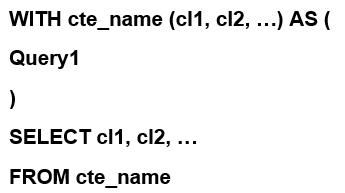

2. Recursive CTE
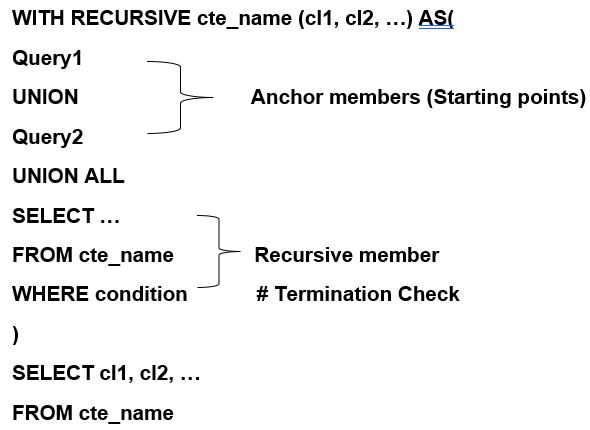

Note that MySQL and PostgreSQL does not require RECURSIVE keyword, while SQL server requires RECURSIVE keyword.

Recursive CTE are mostly used in the following scenarios:
1.	Filling in missing rows of sequence of data
2.	Return all parents of a child row (hierarchical data structure)

Note the following caveats for CTE:
1.	Number of columns defined in CTE must match number of columns defined within WITH clause
2.	Same number of columns and data types in both anchor and recursive members of the CTE
3.	FROM clause of recursive member refers only one time to cte_name
4.	UNION used to stack multiple anchor members together
5.	UNION ALL used to stack last anchor member with multiple recursive members together
6.	Following keywords/functions not allowed in recursive members:
-	SELECT DISTINCT
-	GROUP BY
-	HAVING
-	ORDER BY
-	All joins (except for inner join)
-	Subqueries
-	Group functions (Aggregation and Window functions)


## <u>Stacking Results from Multiple Queries</u>

While joins are used to link multiple tables together based on common attributes, <b>UNION</b> and <b>UNION ALL</b> operators are used to stack results from similar queries together on the same table.

<b>UNION</b>: Select distinct results from multiple queries (More commonly used than UNION ALL)

<b>UNION ALL</b>: Select all results including duplicates from multiple queries

Example of using UNION:

Display all current employees and managers' first name, last name, the name of department that they are working at and the start date of working in that department and label all employees as "employees" and managers as "managers" in "position" column

In [79]:
pd.read_sql('''SELECT first_name, last_name, dept_name, from_date, "Employees" AS position FROM dept_emp
            INNER JOIN employees USING(emp_no)
            INNER JOIN departments USING(dept_no)
            WHERE to_date IS NULL
            UNION
            SELECT first_name, last_name, dept_name, from_date, "Managers" AS position FROM dept_manager
            INNER JOIN employees USING(emp_no)
            INNER JOIN departments USING(dept_no)
            WHERE to_date IS NULL
            ORDER BY position, from_date;''', conn)

,first_name,last_name,dept_name,from_date,position
0,Przemyslawa,Kaelbling,Sales,1985-01-01,Employees
1,Arie,Staelin,Research,1985-01-01,Employees
2,DeForest,Hagimont,Development,1985-01-01,Employees
3,Peternela,Onuegbe,Quality Management,1985-01-01,Employees
4,Tonny,Butterworth,Customer Service,1985-01-01,Employees
...,...,...,...,...,...
240128,Karsten,Sigstam,Human Resources,1992-03-21,Managers
240129,Leon,DasSarma,Development,1992-04-25,Managers
240130,Dung,Pesch,Quality Management,1994-06-28,Managers
240131,Yuchang,Weedman,Customer Service,1996-01-03,Managers


Note that for using UNION or UNION ALL operators:

<b>1. Number of columns must match across all queries</b>

<b>2. Data types of columns must match in order</b>